<a href="https://colab.research.google.com/github/hishaam19/RockID/blob/TrainingModelsAlex/RoughStoneModel80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,regularization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import regularizers
#import seaborn as sns
print(tf. __version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [ ]:
img_width=224
img_height=224
batch_size=32
num_of_classes=17

TRAIN_DIR= "/kaggle/input/25-roughtstones/AllRoughGemstones1WithNewClassesTrain/train"
TEST_DIR= "/kaggle/input/25-roughtstones/AllRoughGemstones1WithNewClassesTrain/test"
VAL_DIR = "/kaggle/input/25-roughtstones/AllRoughGemstones1WithNewClassesTrain/val"

In [ ]:
#preprocessing datasets
train_data = ImageDataGenerator(
                                    rescale=1./255,

                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=False,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    vertical_flip=False  )


val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

train_gen = train_data.flow_from_directory(TRAIN_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))


val_gen = val_data.flow_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False,
                                                target_size=(img_height, img_width))

test_gen = test_data.flow_from_directory(TEST_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False,
                                                target_size=(img_height, img_width))


"""val_gen=tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)
test_gen=tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)"""

Found 6581 images belonging to 25 classes.
Found 811 images belonging to 25 classes.
Found 848 images belonging to 25 classes.


"val_gen=tf.keras.utils.image_dataset_from_directory(\n    VAL_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)\ntest_gen=tf.keras.utils.image_dataset_from_directory(\n    TEST_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)"

In [ ]:
label_dict = train_gen.class_indices
print(label_dict)

model=Sequential()
pretrained_model=tf.keras.applications.MobileNetV2(include_top=False,
              weights='imagenet',
              input_shape=(img_height,img_width,3),pooling='max')
for layer in pretrained_model.layers:
  layer.trainable = True


#model.add(Dense(512,bias_regularizer='l1_l2',kernel_regularizer='l1_l2',activity_regularizer='l1_l2',activation='relu'))
model.add(pretrained_model)
#model.add(BatchNormalization())
#model.add(Flatten())
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))

"""model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(70, activation='softmax'))"""


model.compile(optimizer=Adam(learning_rate=0.00001),
      loss='categorical_crossentropy',
      metrics =['accuracy'])

model.summary()

{'agate': 0, 'alexandrite': 1, 'amethyst': 2, 'aquamarine': 3, 'basalt': 4, 'citrine': 5, 'coal': 6, 'diamond': 7, 'emerald': 8, 'garnet': 9, 'granite': 10, 'jade': 11, 'lapis Lazuli': 12, 'limestone': 13, 'moonstone': 14, 'morganite': 15, 'opal': 16, 'peridot': 17, 'quartzite': 18, 'ruby': 19, 'sandstone': 20, 'sapphire': 21, 'tanzanite': 22, 'topaz': 23, 'turquoise': 24}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_4 (Dense)             (None, 2048)              2623488   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5

In [ ]:

ModelCallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]

history = model.fit(train_gen,epochs=30,verbose=1,validation_data=val_gen,callbacks=ModelCallbacks )

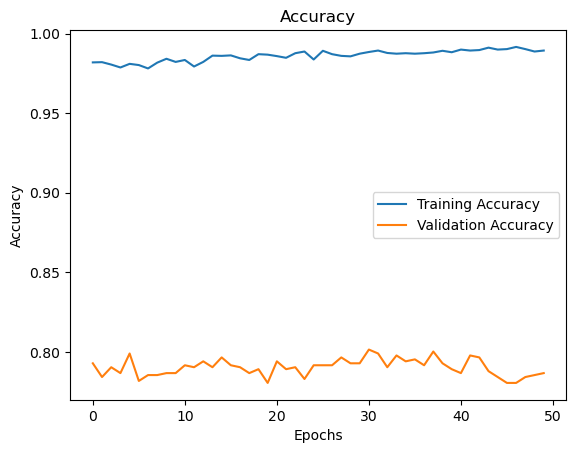

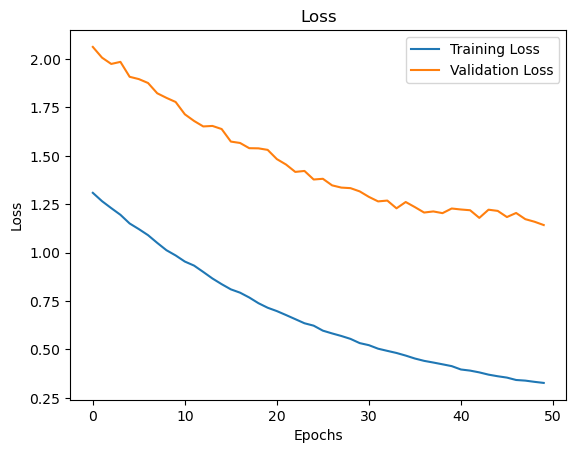

In [ ]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluate test data
27/27 [==============================] - 3s 123ms/step - loss: 1.0844 - accuracy: 0.7995
Test Loss: 1.0843881368637085
Test Accuracy: 0.7995283007621765


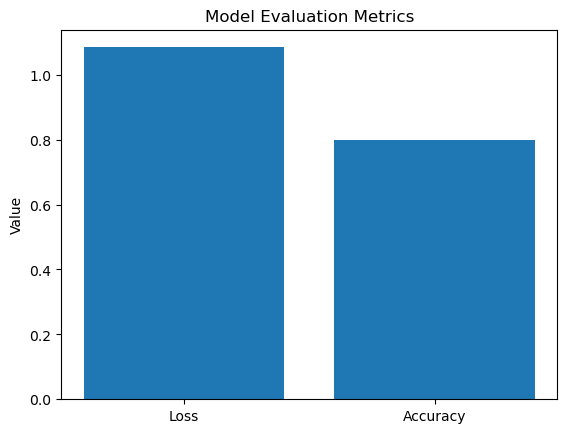

In [ ]:
print("Evaluate test data")
#Save model
#tf.keras.saving.save_model("/content/sample_data/")


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the evaluation metrics
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_accuracy]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

In [ ]:
model.save('mobileNet1RoughExtra80%.h5')
# Compute the confusion matrix
model.save_weights('model_weights1RoughExtra80%.h5')
"""num_classes = val_gen.num_classes
y_train_true = val_gen.classes
y_train_pred_probs = model.predict(val_gen)
y_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)

train_cm = confusion_matrix(y_train_true, y_train_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()"""

'num_classes = val_gen.num_classes\ny_train_true = val_gen.classes\ny_train_pred_probs = model.predict(val_gen)\ny_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)\n\ntrain_cm = confusion_matrix(y_train_true, y_train_pred_classes)\n\n# Plot the confusion matrix as a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)\nplt.title("Validation Confusion Matrix")\nplt.xlabel("Predicted Labels")\nplt.ylabel("True Labels")\nplt.show()'

In [ ]:
""""classes=['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst','Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green',
         'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Cats Eye',
         'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine',
         'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite',
         'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli',
         'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx', 'Opal', 'Pearl', 'Peridot',
         'Pyrite', 'Pyrope', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire',
          'Serpentine', 'Sodalite', 'Spessartite',
         'Sphene','Sunstone', 'Tanzanite', 'Tigers Eye', 'Topaz', 'Tourmaline', 'Tsavorite',
         'Turquoise', 'Variscite', 'Zircon', 'Zoisite']"""

classes=['agate', 'alexandrite', 'amethyst', 'aquamarine', 'citrine',
         'diamond', 'emerald', 'garnet', 'jade', 'lapis Lazuli', 'moonstone',
 'morganite', 'opal', 'peridot', 'ruby', 'sapphire', 'tanzanite', 'topaz', 'turquoise']

#model1 = tf.keras.models.load_model('gem79%1.h5')
label_dict = train_gen.class_indices
#print(label_dict)
img = tf.keras.preprocessing.image.load_img('/kaggle/input/cleanedroughgemstones/RoughGemstones2Train/test/topaz/topaz_138.jpg',
                                            target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
# Rescale the image array
img_array = img_array / 255.0
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = tf.expand_dims(img_array, axis=0)
#preprocessed_img = preprocess_input(img_array)
predictions = model.predict(img_array)
print(predictions)
max_index = np.argmax(predictions)
print("Maximum index:", max_index)
print(predictions[0][max_index])
print("The model is predicting this rock as:",classes[max_index])
